In [1]:
from sklearn import model_selection, datasets, ensemble, tree
import numpy as np


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def create_and_write_in_file(filename, answer):
    with open(filename, "w") as f:
        f.write(str(answer))

In [4]:
dataset = datasets.load_digits()

In [5]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
X = dataset['data']
y = dataset['target']

In [7]:
X.shape, y.shape

((1797, 64), (1797,))

In [8]:
y

array([0, 1, 2, ..., 8, 9, 8])

# Задание №1

In [9]:
dec_tree_model = tree.DecisionTreeClassifier()

In [10]:
cross_1 = model_selection.cross_val_score(dec_tree_model, X, y, cv=10)

In [11]:
cross_1

array([0.80555556, 0.87222222, 0.82777778, 0.81111111, 0.77777778,
       0.86666667, 0.86666667, 0.82681564, 0.81005587, 0.79329609])

In [12]:
result = cross_1.mean()

In [13]:
result

0.8257945375543141

In [14]:
create_and_write_in_file("answer_1", result)

# Задание №2

In [15]:
bagging_cl_model = ensemble.BaggingClassifier(n_estimators=100)

In [16]:
cross_2 = model_selection.cross_val_score(bagging_cl_model, X, y, cv=10)

In [17]:
cross_2

array([0.87777778, 0.95555556, 0.91111111, 0.91666667, 0.91111111,
       0.97777778, 0.97777778, 0.91061453, 0.88268156, 0.92178771])

In [18]:
result_2 = cross_2.mean()

In [19]:
result_2

0.9242861576660459

In [20]:
create_and_write_in_file("answer_2", result_2)

# Задание №3

In [21]:
np.int(np.sqrt(len(X[0])))

8

In [22]:
bagging_cl_model_sqrd = ensemble.BaggingClassifier(n_estimators=100, max_features=np.int(np.sqrt(len(X[0]))))

In [23]:
cross_3 = model_selection.cross_val_score(bagging_cl_model_sqrd, X, y, cv=10)

In [24]:
cross_3

array([0.90555556, 0.96111111, 0.93888889, 0.89444444, 0.93888889,
       0.93888889, 0.97222222, 0.98882682, 0.90502793, 0.90502793])

In [25]:
result_3 = cross_3.mean()

In [26]:
result_3

0.9348882681564248

In [27]:
create_and_write_in_file("answer_3", result_3)

# Задание №4

In [28]:
dec_tree_model_4 = tree.DecisionTreeClassifier(max_features=np.int(np.sqrt(len(X[0]))))

In [29]:
bagging_cl_model_sqrd_4 = ensemble.BaggingClassifier(dec_tree_model_4, n_estimators=100)

In [30]:
cross_4 = model_selection.cross_val_score(bagging_cl_model_sqrd_4, X, y, cv=10)

In [31]:
result_4 = cross_4.mean()

In [32]:
result_4

0.9476846679081316

In [33]:
create_and_write_in_file("answer_4", result_4)

# Задание 5

In [34]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators=100) 

In [35]:
cross_5 = model_selection.cross_val_score(random_forest_model, X, y, cv=10)

In [36]:
cross_5.mean()

0.9471322160148976

In [37]:
count_estimators = [5, 10, 15, 50, 100, 500]

In [38]:
%%time
list_cross = []
for i, count in enumerate(count_estimators):
    random_forest_model = ensemble.RandomForestClassifier(n_estimators=count)
    cross_5 = model_selection.cross_val_score(random_forest_model, X, y, cv=10)
    m_cross = cross_5.mean()
    list_cross.append(m_cross)
    print("iteration: ", i)
    print("cross: {}, count_estimators: {}".format(m_cross, count))
    

iteration:  0
cross: 0.8814866542520173, count_estimators: 5
iteration:  1
cross: 0.9204220980757294, count_estimators: 10
iteration:  2
cross: 0.9354686530105525, count_estimators: 15
iteration:  3
cross: 0.9437926753569211, count_estimators: 50
iteration:  4
cross: 0.9493513345747981, count_estimators: 100
iteration:  5
cross: 0.9526970825574177, count_estimators: 500
Wall time: 33.4 s


No handles with labels found to put in legend.


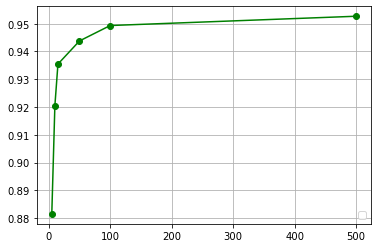

In [39]:
pylab.grid(True)
pylab.plot(count_estimators, list_cross, 'g-', marker='o')
pylab.legend(loc='lower right')

In [40]:
list_count_decision = [5, 10, 20, 30, 40, 50, 60]

In [41]:
%%time
list_cross_2 = []
for i, count in enumerate(list_count_decision):
    random_forest_model = ensemble.RandomForestClassifier(max_features=count)
    cross_5 = model_selection.cross_val_score(random_forest_model, X, y, cv=10)
    m_cross = cross_5.mean()
    list_cross_2.append(m_cross)
    print("iteration: ", i)
    print("cross: {}, features: {}".format(m_cross, count))

iteration:  0
cross: 0.9593730602110491, features: 5
iteration:  1
cross: 0.9471198013656114, features: 10
iteration:  2
cross: 0.9432122905027931, features: 20
iteration:  3
cross: 0.9426505276225946, features: 30
iteration:  4
cross: 0.9387616387337058, features: 40
iteration:  5
cross: 0.9331998758535072, features: 50
iteration:  6
cross: 0.9265207945375543, features: 60
Wall time: 1min 7s


No handles with labels found to put in legend.


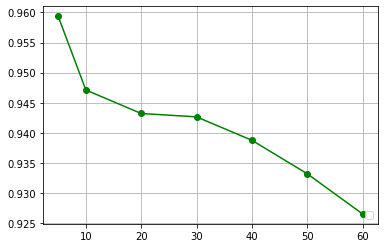

In [42]:
pylab.grid(True)
pylab.plot(list_count_decision, list_cross_2, 'g-', marker='o')
pylab.legend(loc='lower right')

Пункт 4 (зависимость от глубины дерева)

In [43]:
list_depth = [1, 5, 10, 15, 20]

In [46]:
%%time
list_cross_3 = []
for i, count in enumerate(list_depth):
    random_forest_model = ensemble.RandomForestClassifier(max_depth=count)
    cross_5 = model_selection.cross_val_score(random_forest_model, X, y, cv=10)
    m_cross = cross_5.mean()
    list_cross_3.append(m_cross)
    print("iteration: ", i)
    print("cross: {}, depth: {}".format(m_cross, count))

iteration:  0
cross: 0.6972222222222222, depth: 1
iteration:  1
cross: 0.9115176908752328, depth: 5
iteration:  2
cross: 0.9454500310366232, depth: 10
iteration:  3
cross: 0.9510086902545002, depth: 15
iteration:  4
cross: 0.9526970825574177, depth: 20
Wall time: 21.2 s


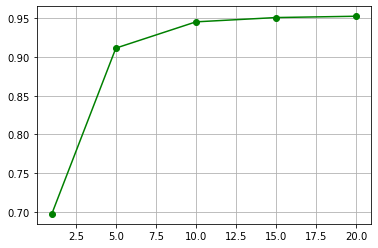

In [47]:
pylab.grid(True)
pylab.plot(list_depth, list_cross_3, 'g-', marker='o')


In [ ]:
with open("answer_5", "w") as f1:
    f1.write("")